In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import pdb
import math

data = pd.read_csv("data_analysis_PIVOT/Facebook_ads-PIVOT_2021.csv", sep=";")
#clean up data 
#throw out some ads
test = data["ad-name"]!="0"
data = data[test]

#throw out who is pivot ads
test = ~data["ad-name"].str.contains("who_is_pivot")
data = data[test]

#throw out annonce ads 
test = ~data["ad-name"].str.contains("annonce")
data = data[test]

#declare features and targets 
features = "h1", "h2", "h3"

targets_portrait = ['Impressions', 'Post shares', 'Post reactions', 'Post comments',
       'Link clicks', 'Post engagements', 'Landing page views']

targets_video = targets_portrait + ['Three-second video views', 'Video watches at 50%',
       'Video watches at 75%', 'Video watches at 95%',
       'Video watches at 100%']

In [50]:
#make new columns based on data encoded in ad name string 
#is it a video? 
is_video = data["ad-name"].str.contains("video")
data["is_video"]= is_video

#or is it a portrait? change!
data["is_portrait"]=~ is_video

#find each entrepreneurs first and last name seperated by _
split_ad_names = [string.split("-") for string in data["ad-name"]] 

#create column for names
names=[field[1] for field in split_ad_names]
data["name"]= names

#create column for language
languages=[field[-1] for field in split_ad_names]
data["language"] = languages

#create column for hypothesis
hypotheses=[field[2] for field in split_ad_names]
data["hypothesis"]= hypotheses

#write to to file 
data.to_excel("Facebook_ads_PIVOT_2021_mod.xlsx")

In [51]:
#maybe make this into a function 
s1 = data["is_video"]==False
s2 = data["language"]=="en"
s3 = data["hypothesis"]=="h1"
data[s1&s2&s3]

,ad-name,target,Hypothesis 1,Hypothesis 2,Hypothesis 3,Teaser,English,French,video,campaign 1,...,Three-second video views,Video watches at 50%,Video watches at 75%,Video watches at 95%,Video watches at 100%,is_video,is_portrait,name,language,hypothesis
112,entrepreneur_portraits-anie_rouleau-h1-infogra...,int-entrepreneur-can-all-25-34,37,0,0,0,0,59,0,0,...,0,0,0,0,0,False,True,anie_rouleau,en,h1
115,entrepreneur_portraits-bill_spenceley-h1-infog...,int-entrepreneur-can-all-25-34,39,0,0,0,0,61,0,0,...,0,0,0,0,0,False,True,bill_spenceley,en,h1
118,entrepreneur_portraits-lil_macpherson-h1-infog...,int-entrepreneur-can-all-25-34,39,0,0,0,0,61,0,0,...,0,0,0,0,0,False,True,lil_macpherson,en,h1
120,entrepreneur_portraits-matt_jamieson-h1-infogr...,int-entrepreneur-can-all-25-34,38,0,0,0,0,60,0,0,...,0,0,0,0,0,False,True,matt_jamieson,en,h1
123,entrepreneur_portraits-matthieu_bonneau-h1-inf...,int-entrepreneur-can-all-25-34,41,0,0,0,0,63,0,0,...,0,0,0,0,0,False,True,matthieu_bonneau,en,h1
126,entrepreneur_portraits-mike_beamish-h1-infogra...,int-entrepreneur-can-all-25-34,37,0,0,0,0,59,0,0,...,0,0,0,0,0,False,True,mike_beamish,en,h1
129,entrepreneur_portraits-naomie_caron-h1-infogra...,int-entrepreneur-can-all-25-34,37,0,0,0,0,59,0,0,...,0,0,0,0,0,False,True,naomie_caron,en,h1
131,entrepreneur_portraits-natalie_voland-h1-infog...,int-entrepreneur-can-all-25-34,39,0,0,0,0,61,0,0,...,0,0,0,0,0,False,True,natalie_voland,en,h1
134,entrepreneur_portraits-paul_rak-h1-infography-...,int-entrepreneur-can-all-25-34,33,0,0,0,0,55,0,0,...,0,0,0,0,0,False,True,paul_rak,en,h1
137,entrepreneur_portraits-tabitha_langel-h1-infog...,int-entrepreneur-can-all-25-34,39,0,0,0,0,61,0,0,...,0,0,0,0,0,False,True,tabitha_langel,en,h1


In [52]:
def make_barchart(title, filename, targets, is_video, language): 
    
    #items_count = {}
    #for feature in features: 
        #items_count[feature] = data[data["hypothesis"] == feature].shape[0]
        
    values_for_targets = []

    for target in targets: 
        values = []
        for feature in features:
            selection = (data["hypothesis"]==feature) 
            
            #pdb.set_trace()
    
            if is_video: 
                selection = (selection & (data["is_video"]==is_video))
            if language: 
                selection = (selection & (data["language"]==language))
                
            value = data[selection][target].sum()/data[selection].shape[0]
            values.append(value)
        values_for_targets.append(values)

    names = features
    
    columns = 2
    rows = math.ceil(len(targets)/2)
    
    plt.figure(figsize=(15, 5*rows))

    for target,(i,values) in zip(targets,enumerate(values_for_targets)): 
        plt.subplot(rows, columns,i+1)
        plt.bar(names, values)
        plt.title(target)

    plt.suptitle(title)
    
    plt.savefig(filename)

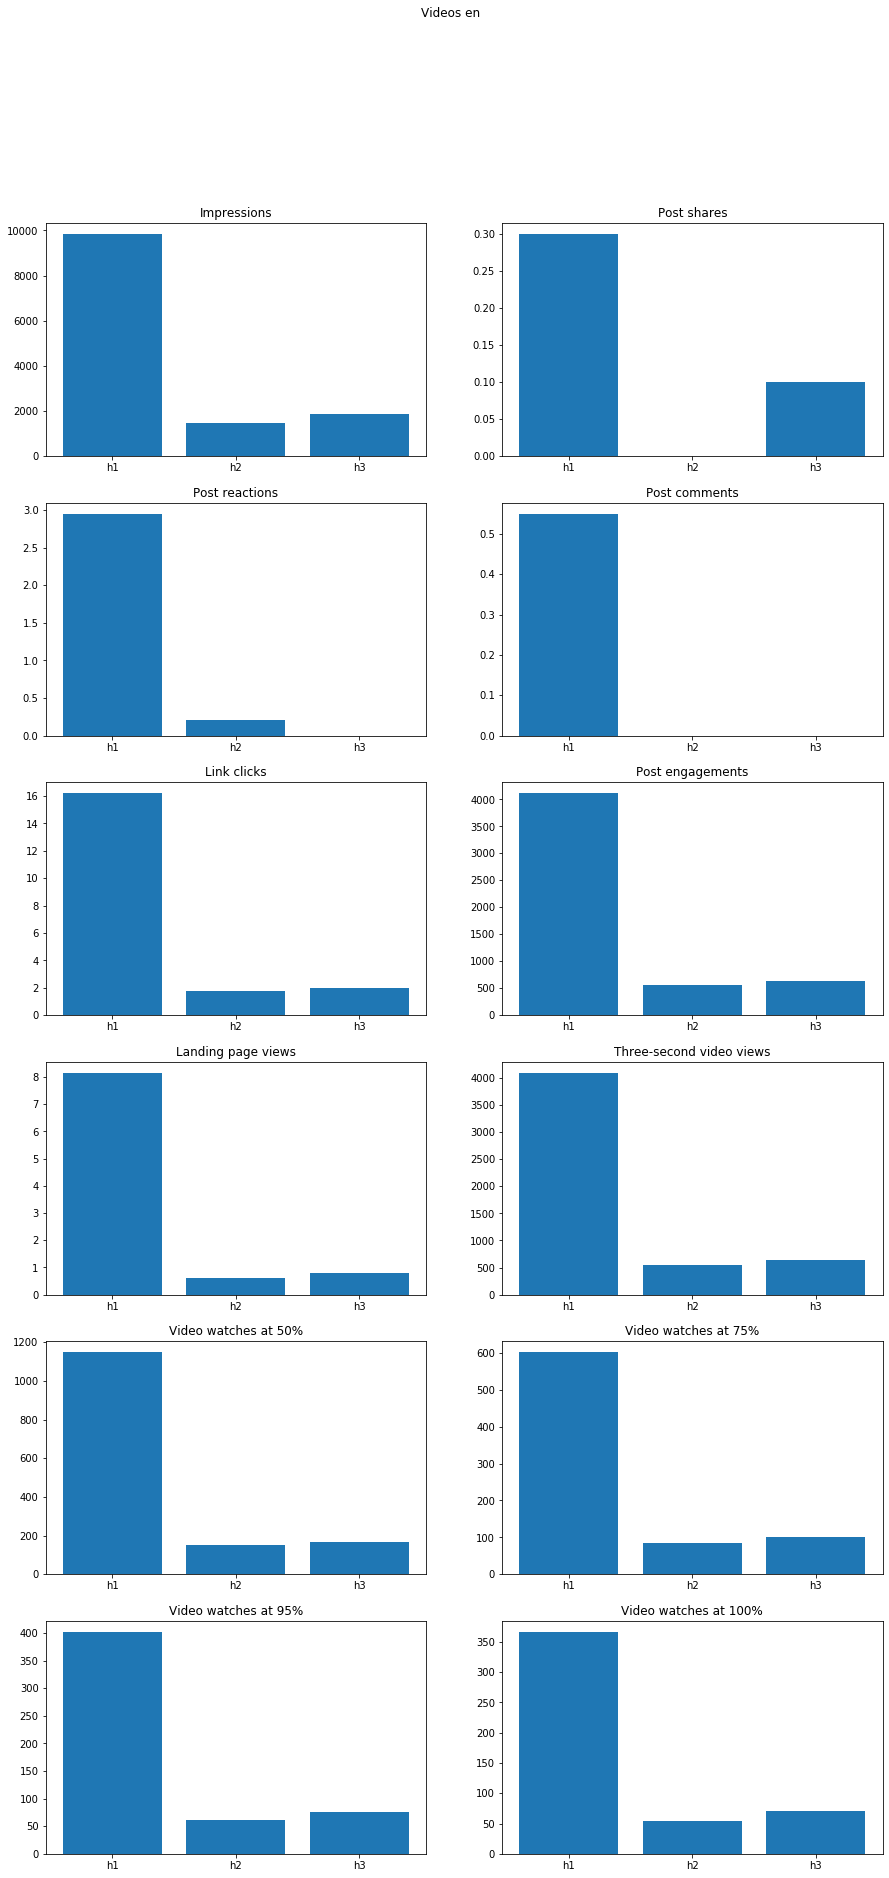

In [56]:
make_barchart("Videos en", "pivot_h1-h3_barchart_videos_en.png", targets_video, is_video = True, language="en")

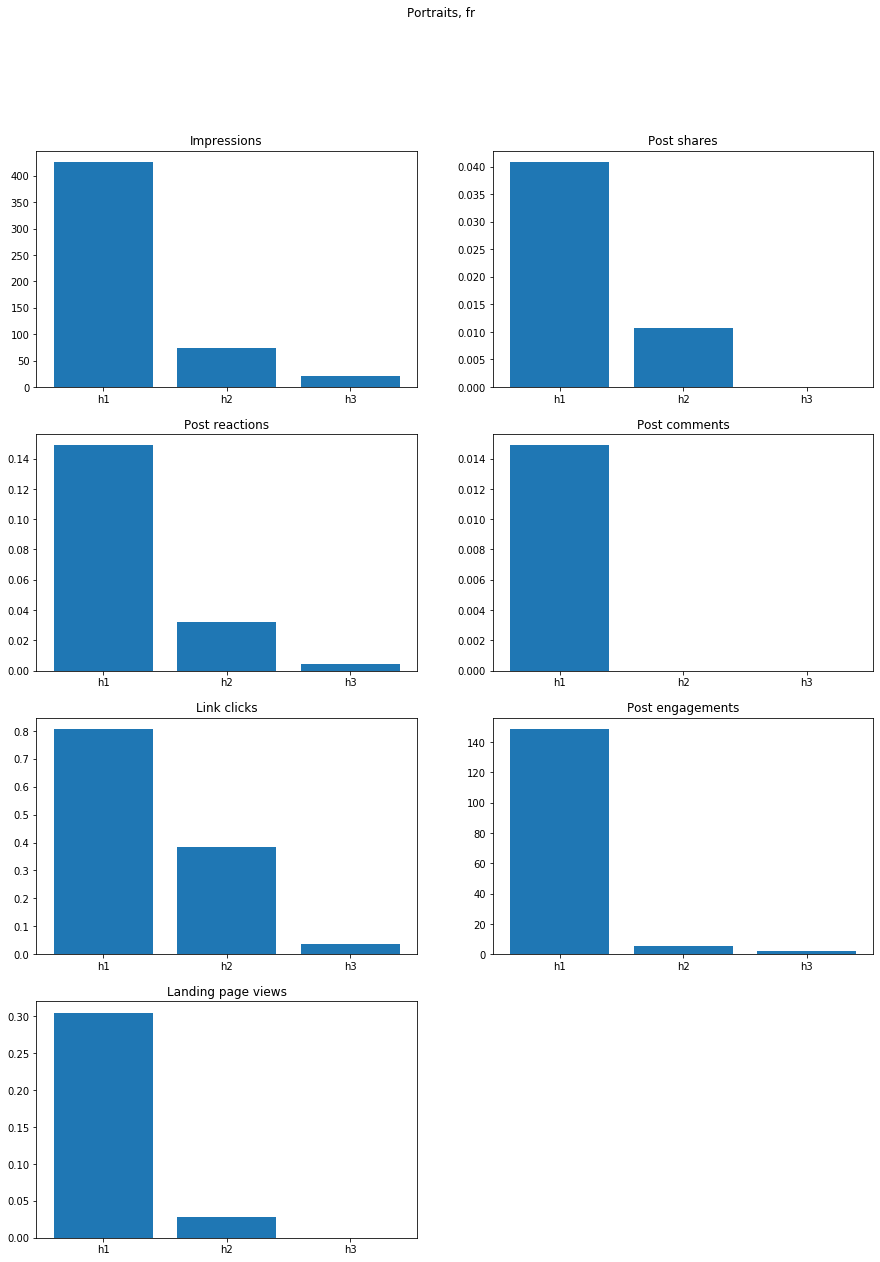

In [38]:
make_barchart("Portraits, fr", "pivot_h1-h3_barchart_portrait_fr.png", targets_portrait, is_video = False, language="fr")

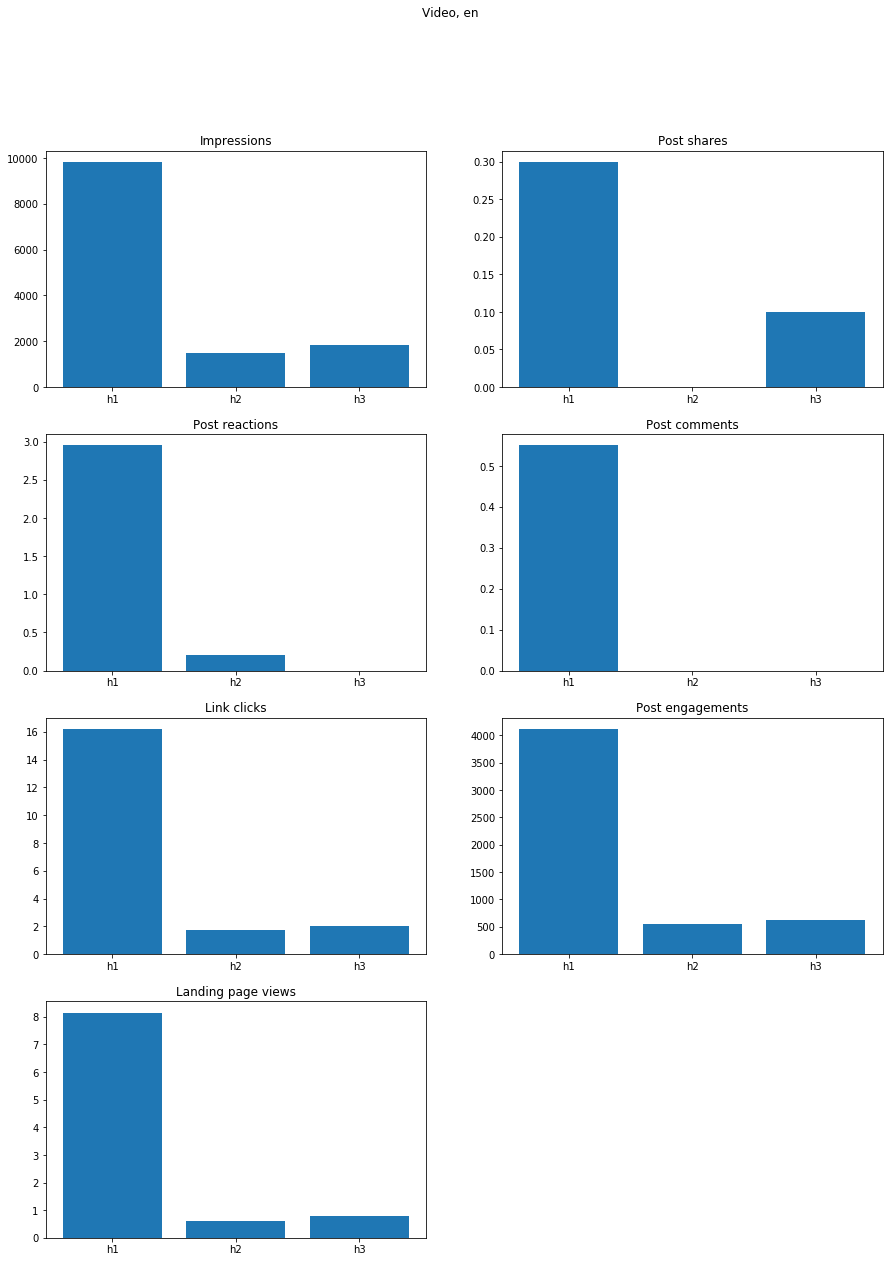

In [43]:
make_barchart("Video, en", "pivot_h1-h3_barchart_video_en.png", targets_portrait, is_video = True, language="en")